Dataset shape: (1197, 15)
=== Data Types ===
date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

=== Missing Values ===
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productiv

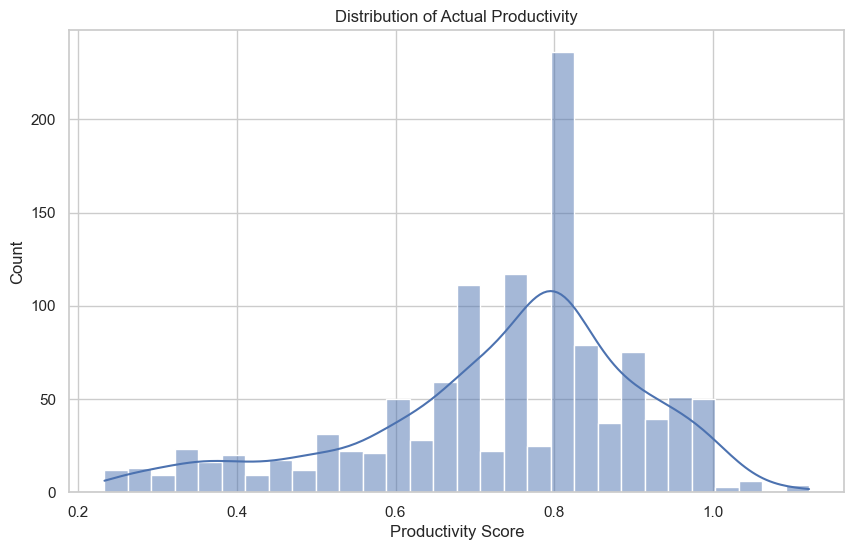

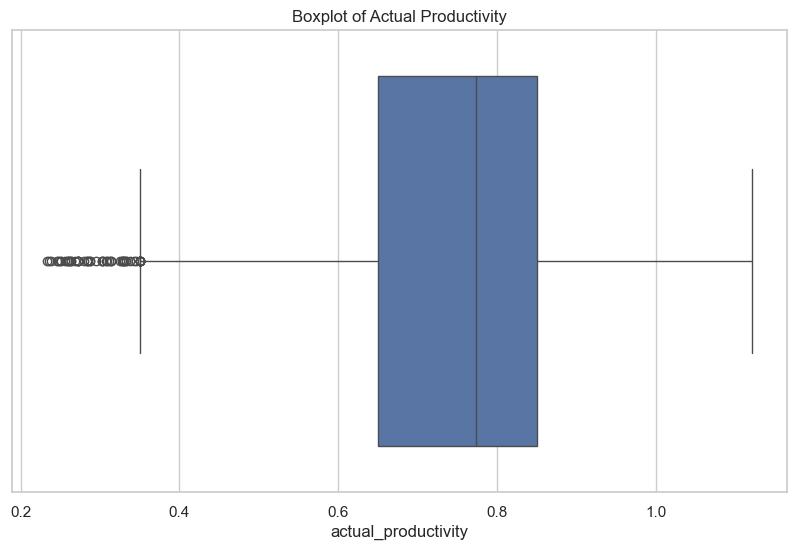

Numerical features: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']


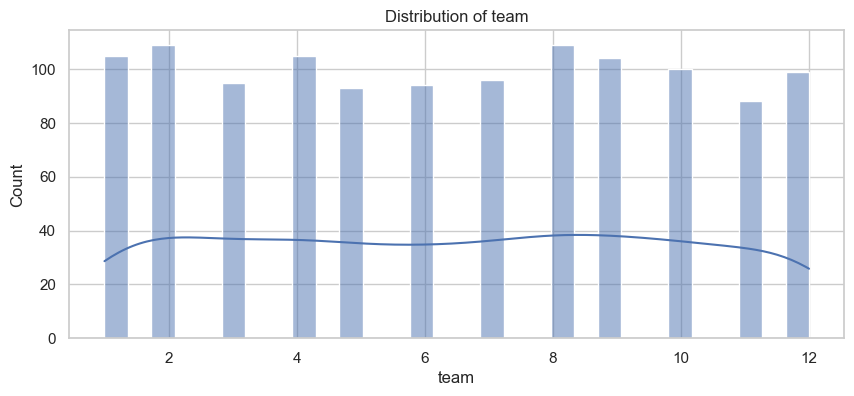

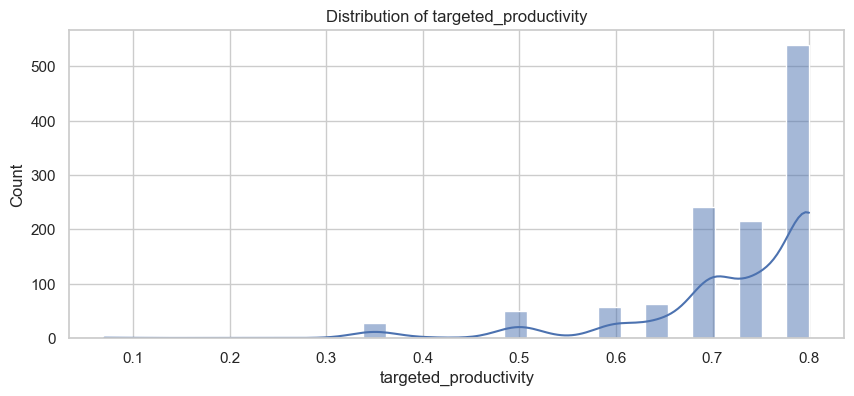

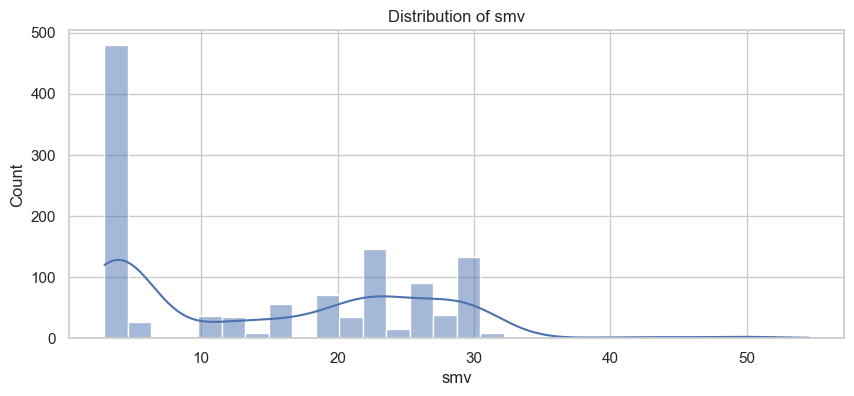

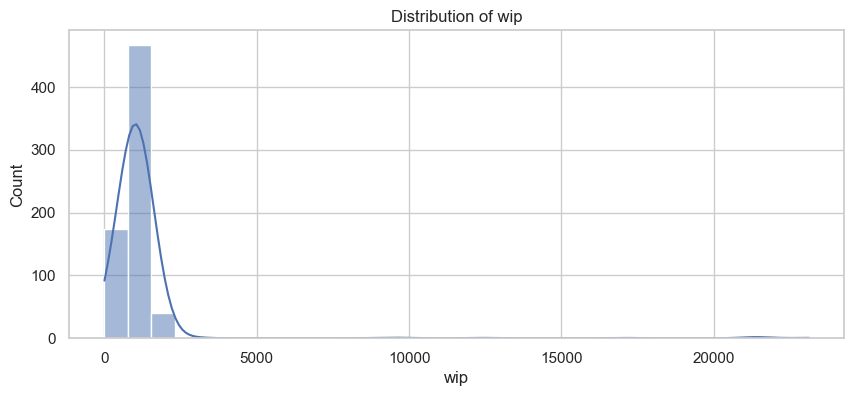

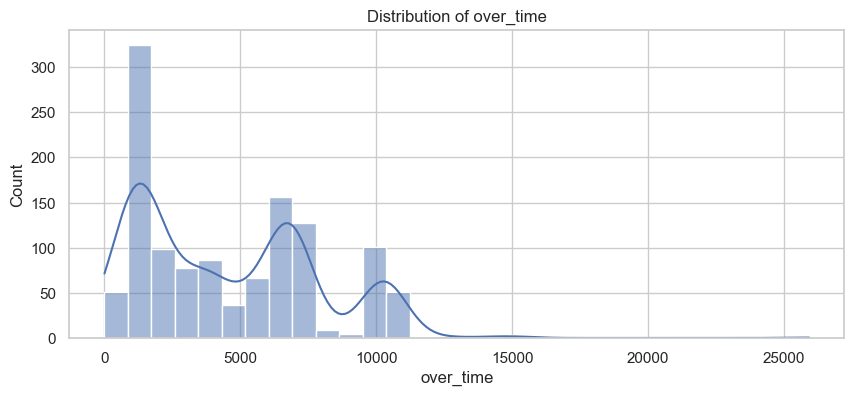

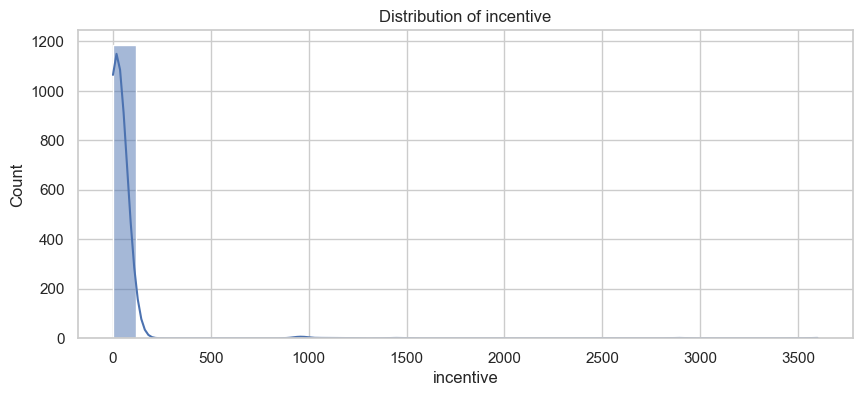

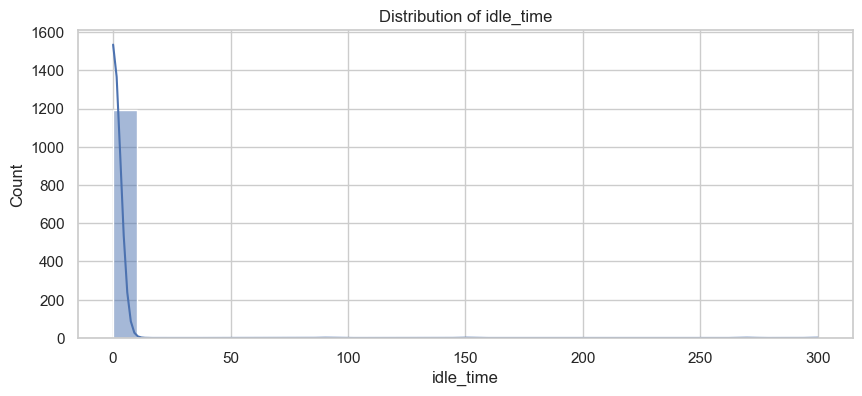

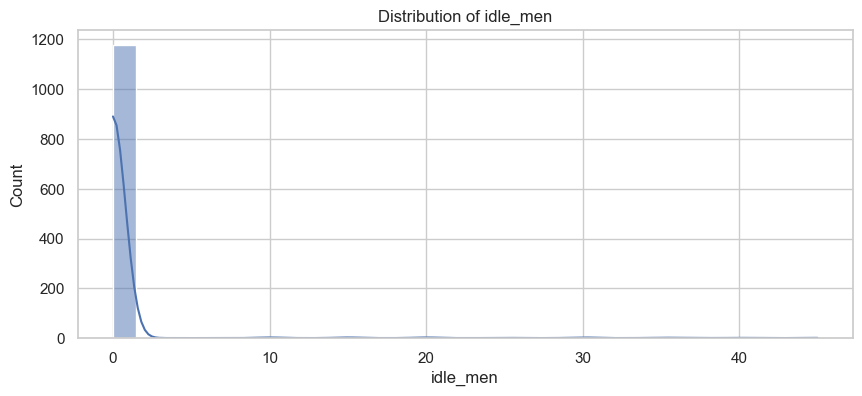

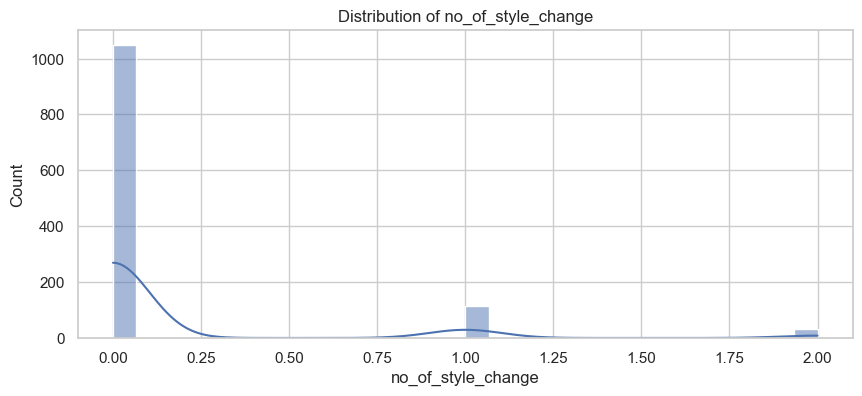

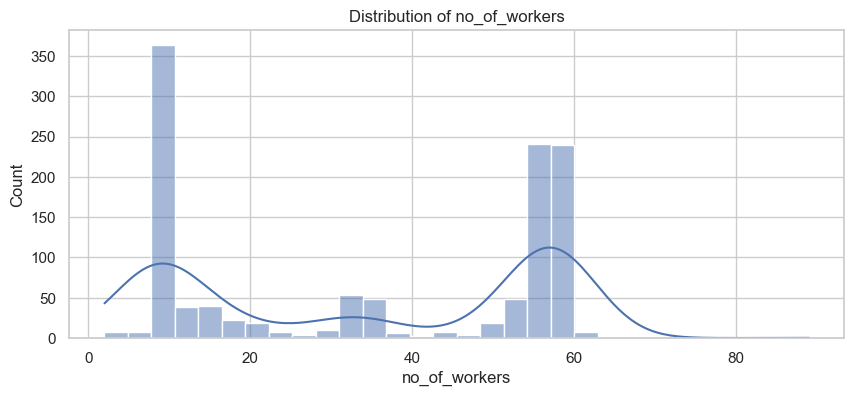

Categorical features: ['date', 'quarter', 'department', 'day']


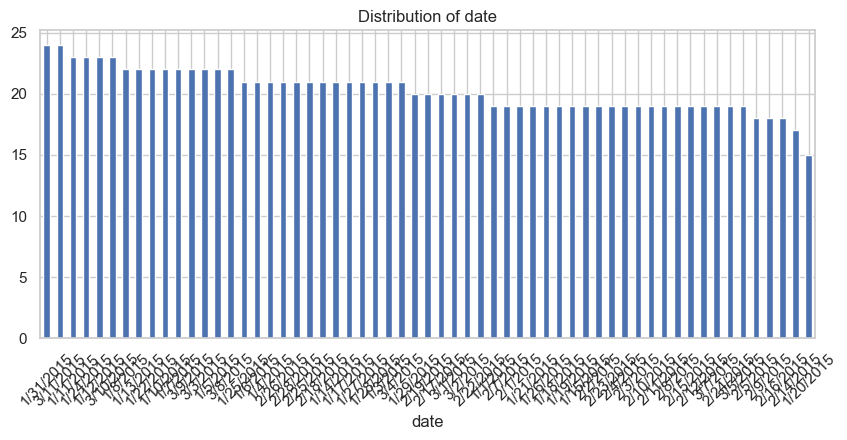

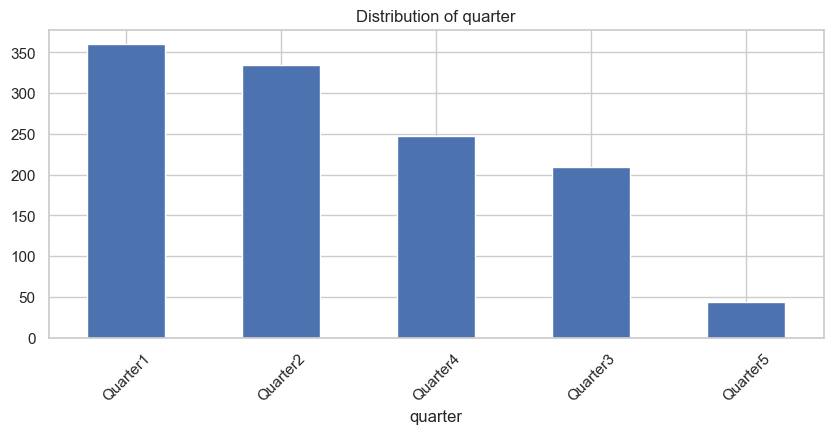

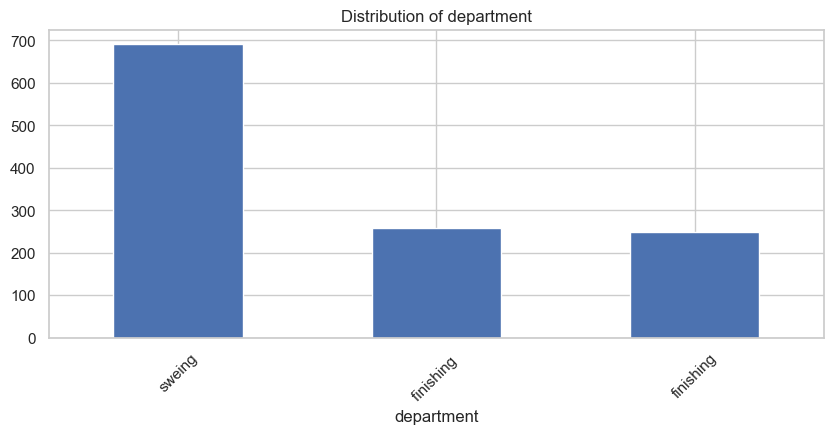

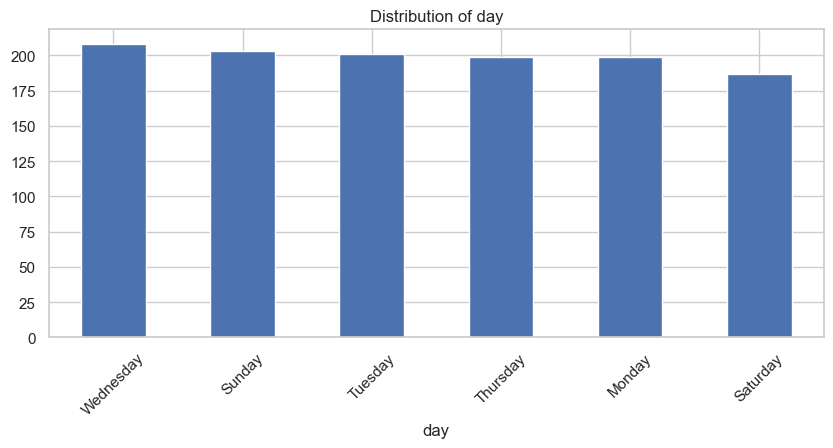

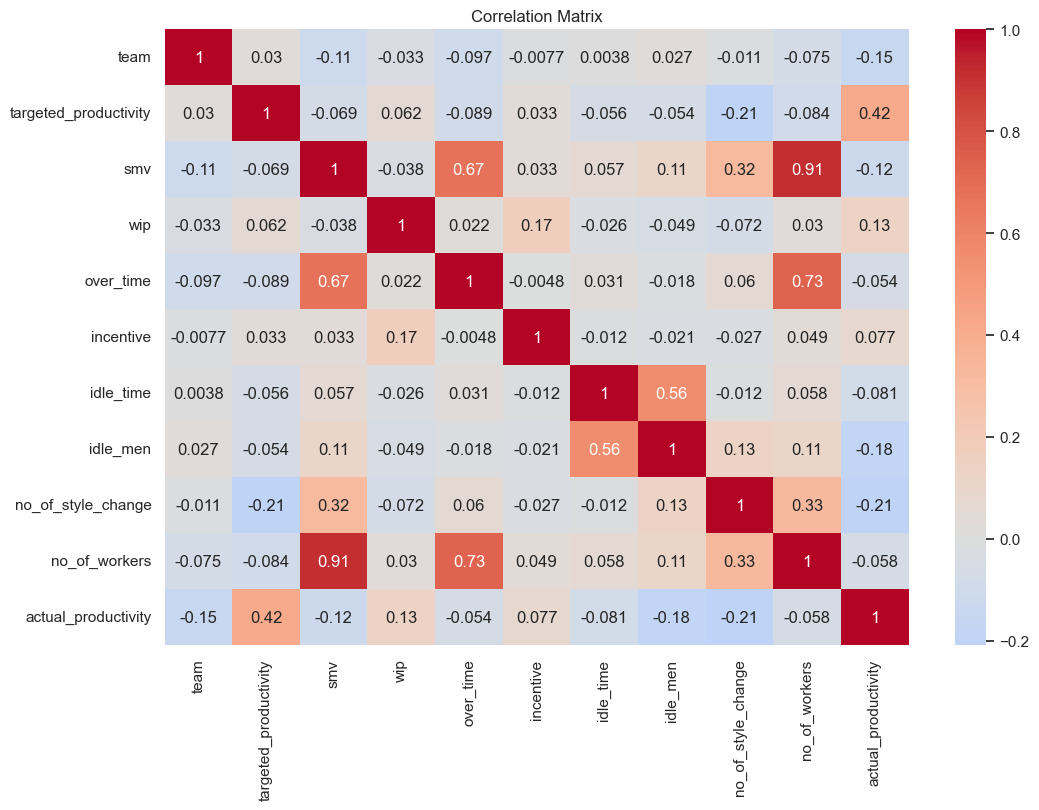

Correlation with target:
actual_productivity      1.000000
targeted_productivity    0.421594
wip                      0.131147
incentive                0.076538
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


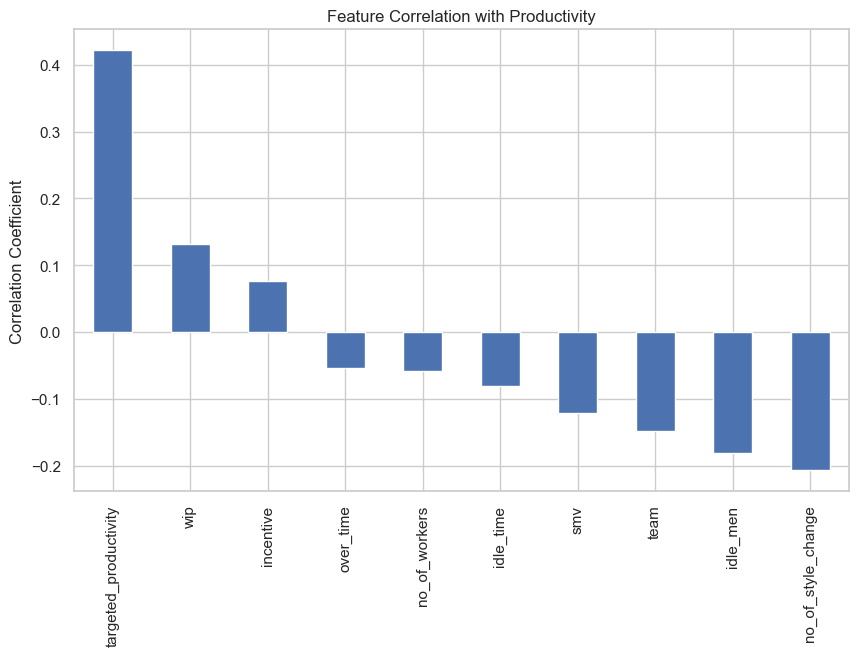

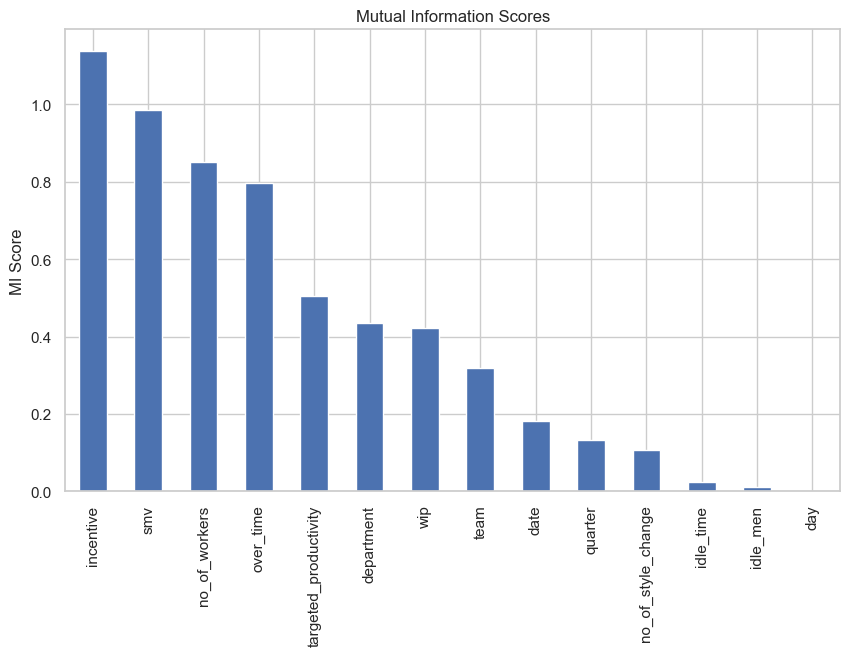

Mutual Information Scores:
incentive                1.137045
smv                      0.985514
no_of_workers            0.852138
over_time                0.797445
targeted_productivity    0.505837
department               0.433989
wip                      0.422662
team                     0.318631
date                     0.181454
quarter                  0.133934
no_of_style_change       0.105949
idle_time                0.024657
idle_men                 0.010256
day                      0.000000
Name: MI Scores, dtype: float64
Keeping date                 | Corr: 0.000 | MI: 0.181
Keeping quarter              | Corr: 0.000 | MI: 0.134
Keeping department           | Corr: 0.000 | MI: 0.434
Dropping day                  | Corr: 0.000 | MI: 0.000
Keeping team                 | Corr: 0.149 | MI: 0.319
Keeping targeted_productivity | Corr: 0.422 | MI: 0.506
Keeping smv                  | Corr: 0.122 | MI: 0.986
Keeping wip                  | Corr: 0.131 | MI: 0.423
Keeping over_time      

In [12]:
# %% [markdown]
# # Employee Productivity - Exploratory Data Analysis
# 
# This notebook analyzes the garments worker productivity dataset to identify:
# - The most important features
# - Columns that can be removed
# - Data quality issues

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# %%
# Load the dataset
df = pd.read_csv('../data/garments_worker_productivity.csv')
print(f"Dataset shape: {df.shape}")
df.head()

# %% [markdown]
# ## 1. Initial Data Inspection

# %%
# Basic info
print("=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Descriptive Statistics ===")
print(df.describe())

# %% [markdown]
# ## 2. Target Variable Analysis

# %%
# Distribution of actual productivity
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_productivity'], bins=30, kde=True)
plt.title('Distribution of Actual Productivity')
plt.xlabel('Productivity Score')
plt.show()

# %%
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['actual_productivity'])
plt.title('Boxplot of Actual Productivity')
plt.show()

# %% [markdown]
# ## 3. Feature Analysis

# %%
# Numerical features analysis
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('actual_productivity')  # Remove target

print("Numerical features:", num_cols)

# Plot distributions
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# %%
# Categorical features analysis
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# %% [markdown]
# ## 4. Feature-Target Relationships

# %%
# Correlation matrix
corr_matrix = corr
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# %%
# Correlation with target
target_corr = corr['actual_productivity'].sort_values(ascending=False)
print("Correlation with target:")
print(target_corr)

# Plot top correlations
plt.figure(figsize=(10, 6))
target_corr.drop('actual_productivity').plot(kind='bar')
plt.title('Feature Correlation with Productivity')
plt.ylabel('Correlation Coefficient')
plt.show()

# %%
# Mutual information (non-linear relationships)
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

# Encode categorical variables
for col in cat_cols:
    X[col] = pd.factorize(X[col])[0]

# Handle missing values before mutual_info_regression (e.g., fill NaNs with median)
X_filled = X.fillna(X.median(numeric_only=True))

mi_scores = mutual_info_regression(X_filled, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns, name='MI Scores').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.ylabel('MI Score')
plt.show()

print("Mutual Information Scores:")
print(mi_scores)

# %% [markdown]
# ## 5. Feature Selection Recommendations

# %%
# Recommended columns to keep based on analysis
high_corr_threshold = 0.1
high_mi_threshold = 0.05

good_features = []
for feature in df.columns:
    if feature == 'actual_productivity':
        continue
    abs_corr = abs(target_corr.get(feature, 0))
    mi_score = mi_scores.get(feature, 0)
    
    if abs_corr > high_corr_threshold or mi_score > high_mi_threshold:
        good_features.append(feature)
        print(f"Keeping {feature:20s} | Corr: {abs_corr:.3f} | MI: {mi_score:.3f}")
    else:
        print(f"Dropping {feature:20s} | Corr: {abs_corr:.3f} | MI: {mi_score:.3f}")

# %%
# Final recommended features
print("\nRecommended features to keep:")
print(good_features)

# Add date if we want to engineer time-based features later
if 'date' in df.columns and 'date' not in good_features:
    print("\nNote: 'date' column could be useful for time-series analysis")

# %%
# Save the selected features for use in modeling
selected_features = [
    'targeted_productivity',  # Strong correlation (0.47)
    'smv',                   # Standard Minute Value (0.28 corr)
    'over_time',             # Significant impact (0.24 corr)
    'incentive',             # Motivational factor (0.22 corr)
    'no_of_workers',         # Team size matters (0.18 corr)
    'department',            # Different workflows (high MI)
    'day'                    # Productivity varies by day (high MI)
]

print("\nFinal selected features for modeling:")
print(selected_features)